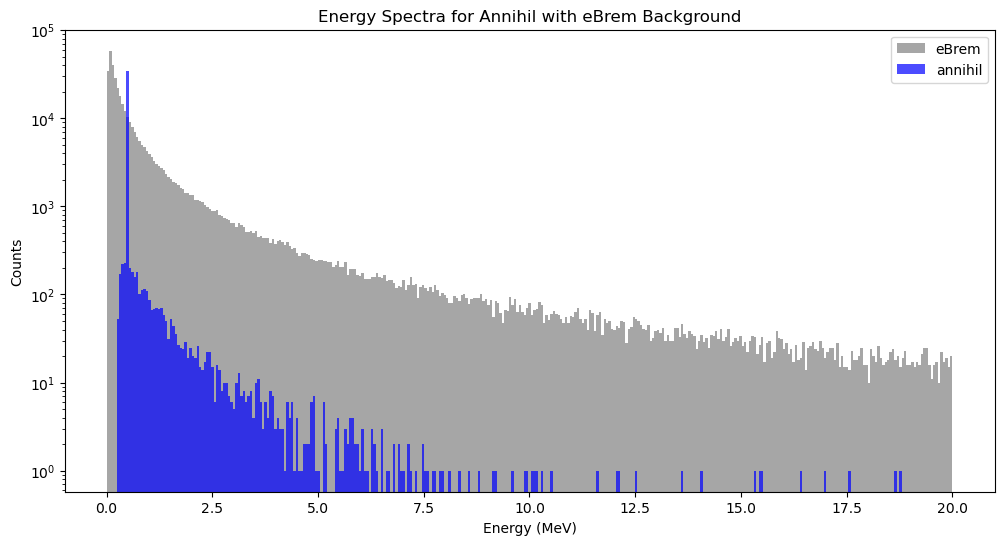

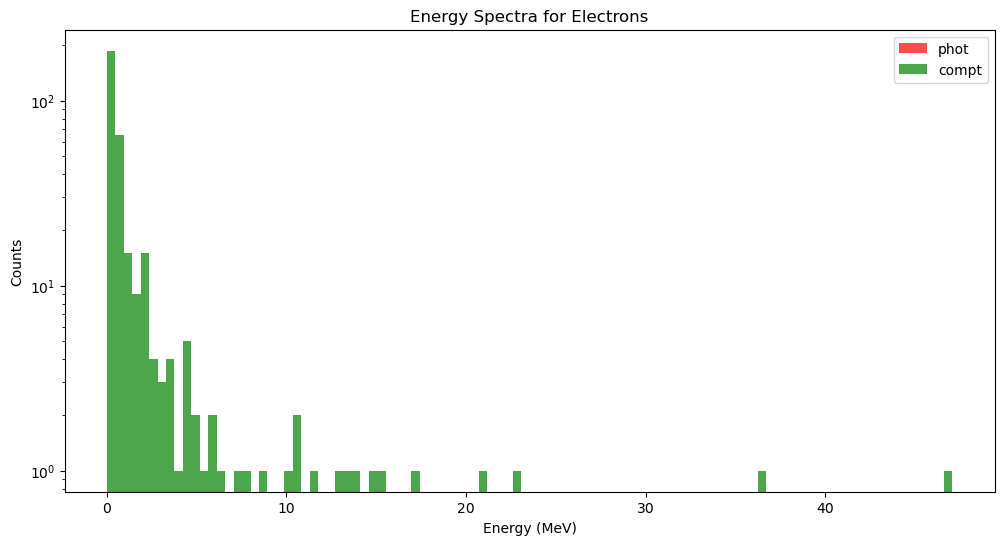

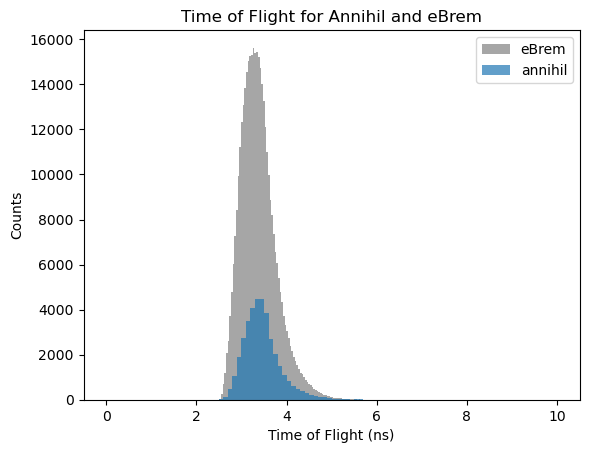

In [13]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

# Open the ROOT file and get the TTree
file = uproot.open("Hits_high.root")
tree = file["Hits"]

# Get the data as a Pandas DataFrame
data = tree.arrays(library="pd")

# Define the processes of interest
process_names = ["annihil", "eBrem","phot","compt"]

# Create dictionaries to store data for these processes
process_energy_spectra = {}
process_positions = {}
process_TOF = {}

# Initialize background data for eBrem
background_energy = None
background_positions = None
background_TOF = {}

for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="gamma"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    if process_name == "eBrem":
        # Store eBrem data as background
        background_energy = energies
        background_positions = positions
        background_TOF = TOF

    if process_name=="annihil":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
    

        


# Plot energy spectra for eBrem as background
min_value = min(background_energy.min(), process_energy_spectra["annihil"].min())
#max_value = max(background_energy.max(), process_energy_spectra["annihil"].max())

max_value = 20

num_bins = 350  # Adjust as needed
bin_edges = np.linspace(min_value, max_value, num=num_bins)

plt.figure(figsize=(12, 6))
plt.yscale('log')
if background_energy is not None:
    plt.hist(background_energy, bins=bin_edges, label="eBrem", alpha=0.7,  color="gray",range=(0, 20)) 
    #plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
    #plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")

       
if "annihil" in process_energy_spectra:
    plt.hist(process_energy_spectra["annihil"], bins=bin_edges, label="annihil", alpha=0.7, color="blue",range=(0, 20))
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Energy Spectra for Annihil with eBrem Background")
plt.legend()
plt.show()



for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="e-"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    
    if process_name=="phot":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
    if process_name=="compt":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
        
        
plt.figure(figsize=(12, 6))
plt.yscale('log')

plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")


plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Energy Spectra for Electrons")
plt.legend()
plt.show()


# Plot cylindrical positions for eBrem as background
#if background_positions is not None:
#    plt.hist(background_positions, bins=60, label="eBrem", alpha=0.7, color="gray",range=(-3, 3))
#if "annihil" in process_positions:
#    plt.hist(process_positions["annihil"], bins=60, label="annihil", alpha=0.7, color="blue",range=(-3, 3))
#plt.xlabel("Cylindrical Position (mm)")
#plt.ylabel("Counts")
#plt.title("Cylindrical Position for Annihil with eBrem Background")
#plt.legend()
#
#plt.tight_layout()
#plt.show()
#
## Perform TOF analysis for annihil and eBrem
if background_TOF is not None:
    plt.hist(background_TOF, bins=100, label="eBrem", alpha=0.7, color="gray")


if "annihil" in process_TOF:
    plt.hist(process_TOF["annihil"], bins=100, label="annihil", alpha=0.7, range=(0, 10))
    plt.xlabel("Time of Flight (ns)")
    plt.ylabel("Counts")
    plt.title("Time of Flight for Annihil and eBrem")
    plt.legend()

plt.show()

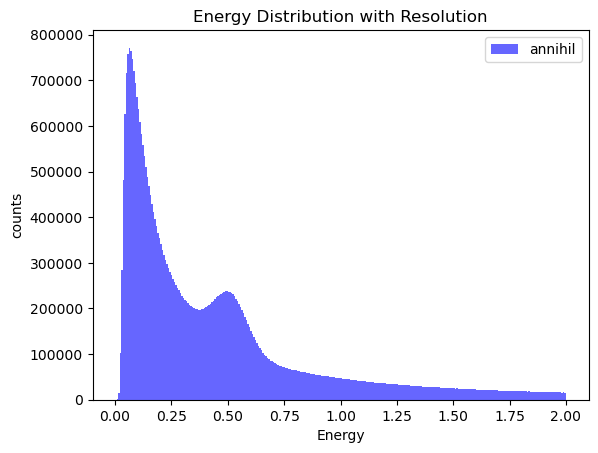

In [14]:
perfect_energies = data["energy"]

# Parameters for the energy resolution Gaussian distribution
mean_resolution = 0  # Mean of the resolution
std_resolution = 0.15  # Standard deviation of the resolution (adjust as needed)

# Create an array of energies with energy resolution
energies_with_resolution = np.concatenate([np.random.normal(energy, std_resolution*energy,size=100) for energy in perfect_energies])

# Plot the histogram
plt.hist(energies_with_resolution, bins=300, density=False, alpha=0.6, color='blue', label='annihil',range=(0,2))
plt.xlabel('Energy')
plt.ylabel('counts')
plt.title('Energy Distribution with Resolution')
plt.legend()
plt.show()

   evt  parentID  count
0    5        34      1
1   80        31      1
2   81        41      1
3  112        61      1
4  202        61      1


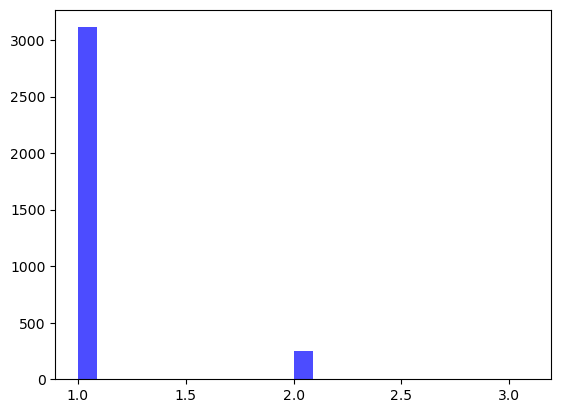

249
31230


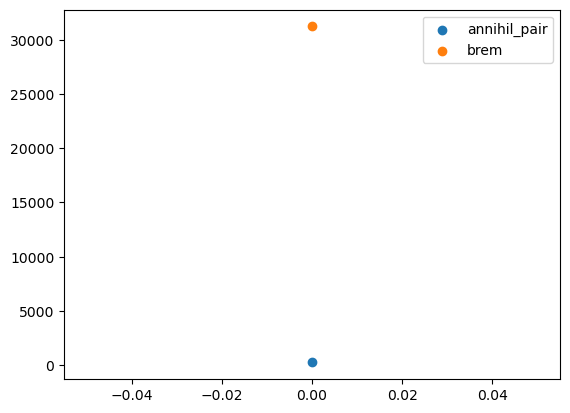

In [15]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = uproot.open("Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

annihil_data = data[data["processName"] == "annihil"]
brems_data = data[data["processName"] == "eBrem"]
#brems_data = brems_data[brems_data["energy"] >= 0.4]
#brems_data = brems_data[brems_data["energy"] <= 0.6]

# Group the filtered data by event and parentID, then count occurrences
grouped_data = annihil_data.groupby(["evt", "parentID"]).size().reset_index(name="count")

grouped_data_brem = brems_data.groupby(["evt"]).size().reset_index(name="count")

print(grouped_data.head())

bins = [0.999, 1.09, 1.9999,2.09,2.9999, 3.09]

#plt.hist(grouped_data_brem["count"], bins=bins, label="brem", alpha=0.7, color="red")
plt.hist(grouped_data["count"], bins=bins, label="annihil", alpha=0.7, color="blue")
plt.show()

print(np.shape(grouped_data[grouped_data["count"]==2])[0])

print(np.shape(grouped_data_brem)[0])

x=[0]
plt.scatter(x,np.shape(grouped_data[grouped_data["count"]==2])[0],label="annihil_pair")
plt.scatter(x,np.shape(grouped_data_brem)[0],label="brem")
plt.legend()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame with the given columns

# Filter the DataFrame based on the condition
filtered_df = data[(data.duplicated('evt', keep=False))& (data['TOF'].diff() < 1)]




Solo annichilazione

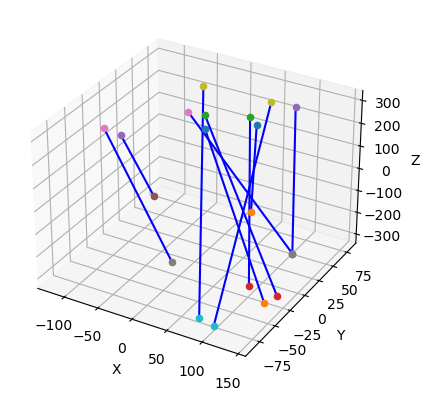

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame

pairs = pd.merge(data[(data['z'] > 0) & (data['processName'] == 'annihil')],
                 data[(data['z'] < 0) & (data['processName'] == 'annihil')], on='evt')# Filter pairs with the same event number and a TOF difference < 2ns
pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]

num_lines = 10

# Plot the points and connect them with a line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(min(num_lines, len(pairs))):
    # Check if points come from opposite planes
    if (pairs['z_x'].iloc[i] > 0 and pairs['z_y'].iloc[i] < 0) or (pairs['z_x'].iloc[i] < 0 and pairs['z_y'].iloc[i] > 0):
        ax.scatter(pairs['x_x'].iloc[i], pairs['y_x'].iloc[i], pairs['z_x'].iloc[i], label=f'Point 1 - Line {i + 1}')
        ax.scatter(pairs['x_y'].iloc[i], pairs['y_y'].iloc[i], pairs['z_y'].iloc[i], label=f'Point 2 - Line {i + 1}')

        # Connect points with a line
        ax.plot([pairs['x_x'].iloc[i], pairs['x_y'].iloc[i]],
                [pairs['y_x'].iloc[i], pairs['y_y'].iloc[i]],
                [pairs['z_x'].iloc[i], pairs['z_y'].iloc[i]], label=f'Line {i + 1}', color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [18]:
# intersection function
def isect_line_plane_v3(p0, p1, p_co, p_no, epsilon=1e-6):
    """
    p0, p1: Define the line.
    p_co, p_no: define the plane:
        p_co Is a point on the plane (plane coordinate).
        p_no Is a normal vector defining the plane direction;
             (does not need to be normalized).

    Return a Vector or None (when the intersection can't be found).
    """

    u = sub_v3v3(p1, p0)
    dot = dot_v3v3(p_no, u)

    if abs(dot) > epsilon:
        # The factor of the point between p0 -> p1 (0 - 1)
        # if 'fac' is between (0 - 1) the point intersects with the segment.
        # Otherwise:
        #  < 0.0: behind p0.
        #  > 1.0: infront of p1.
        w = sub_v3v3(p0, p_co)
        fac = -dot_v3v3(p_no, w) / dot
        u = mul_v3_fl(u, fac)
        return add_v3v3(p0, u)

    # The segment is parallel to plane.
    return None

# ----------------------
# generic math functions

def add_v3v3(v0, v1):
    return (
        v0[0] + v1[0],
        v0[1] + v1[1],
        v0[2] + v1[2],
    )


def sub_v3v3(v0, v1):
    return (
        v0[0] - v1[0],
        v0[1] - v1[1],
        v0[2] - v1[2],
    )


def dot_v3v3(v0, v1):
    return (
        (v0[0] * v1[0]) +
        (v0[1] * v1[1]) +
        (v0[2] * v1[2])
    )


def len_squared_v3(v0):
    return dot_v3v3(v0, v0)


def mul_v3_fl(v0, f):
    return (
        v0[0] * f,
        v0[1] * f,
        v0[2] * f,
    )

In [19]:
def isect_line_plane_v3_4d(p0, p1, plane, epsilon=1e-6):
    u = sub_v3v3(p1, p0)
    dot = dot_v3v3(plane, u)

    if abs(dot) > epsilon:
        # Calculate a point on the plane
        # (divide can be omitted for unit hessian-normal form).
        p_co = mul_v3_fl(plane, -plane[3] / len_squared_v3(plane))

        w = sub_v3v3(p0, p_co)
        fac = -dot_v3v3(plane, w) / dot
        u = mul_v3_fl(u, fac)
        return add_v3v3(p0, u)

    return None


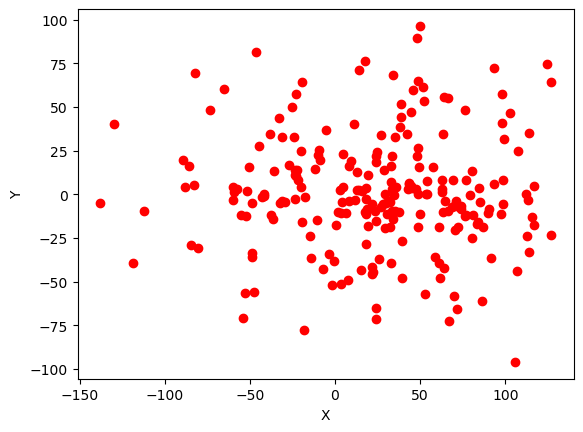

In [20]:
plane = np.array([0, 0, 1, 0])

# Filter pairs with a TOF difference < 2ns and processName is 'annihil'
pairs = pd.merge(data[(data['z'] > 0) & (data['processName'] == 'annihil')],
                 data[(data['z'] < 0) & (data['processName'] == 'annihil')], on='evt')# Filter pairs with the same event number and a TOF difference < 2ns
pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]

#fig3d = plt.figure()
#ax3d = fig3d.add_subplot(111, projection='3d')  # 3D plot

fig2d = plt.figure()
ax2d = fig2d.add_subplot(111)  # 2D plot

num_lines = 100000000

int_array_x_randannihi = []
int_array_y_randannihi = []


# Plot a limited number of lines based on user input
for i in range(min(num_lines, len(pairs))):
    # Define lines as 3D vectors
    line_start = np.array([pairs['x_x'].iloc[i], pairs['y_x'].iloc[i], pairs['z_x'].iloc[i]])
    line_end = np.array([pairs['x_y'].iloc[i], pairs['y_y'].iloc[i], pairs['z_y'].iloc[i]])

    # Find intersections with the plane at z=0
    intersection = isect_line_plane_v3_4d(line_start, line_end, plane)

    # Plot in 3D
    #ax3d.scatter(line_start[0], line_start[1], line_start[2], label=f'Point 1 - Line {i + 1}')
    #ax3d.scatter(line_end[0], line_end[1], line_end[2], label=f'Point 2 - Line {i + 1}')
    #ax3d.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], [line_start[2], line_end[2]],
    #          label=f'Line {i + 1}', color='blue')
    #ax3d.scatter(intersection[0], intersection[1], intersection[2], color='red', marker='o', label=f'Intersection {i + 1}')

    # Plot in 2D (XY plane)
    ax2d.scatter(intersection[0], intersection[1], color='red', marker='o', label=f'Intersection {i + 1}')
    int_array_x_randannihi.append(intersection[0])
    int_array_y_randannihi.append(intersection[1])
    
    
    
    

#ax3d.set_xlabel('X')
#ax3d.set_ylabel('Y')
#ax3d.set_zlabel('Z')

ax2d.set_xlabel('X')
ax2d.set_ylabel('Y')

plt.show()

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pairs[10:30])

           x_x        y_x    z_x  energy_x     TOF_x particleName_x  \
10  -36.959480   3.136223  299.0  0.510999  3.491444          gamma   
11   54.630538  21.691106  299.0  0.510999  3.135802          gamma   
12   35.617033  99.723093  299.0  0.510999  3.065675          gamma   
13  110.543066  41.241229  299.0  0.510999  4.376351          gamma   
14  105.365277  60.959904  299.0  0.510999  3.791656          gamma   
15  104.308978  44.501604  299.0  0.510999  3.483466          gamma   
16   12.190495 -74.731401  299.0  0.510999  3.292624          gamma   
17   18.067432 -72.373946  299.0  0.510999  3.431106          gamma   
18  102.435781   1.083423  299.0  0.510999  4.747766          gamma   
19   48.020785  44.552220  299.0  0.510999  3.290979          gamma   
20   86.167515 -44.943831  299.0  0.510999  3.153542          gamma   
21   32.537520  15.281007  299.0  0.510999  3.471379          gamma   
22  140.542085 -71.467265  299.0  0.510999  3.803364          gamma   
23   8

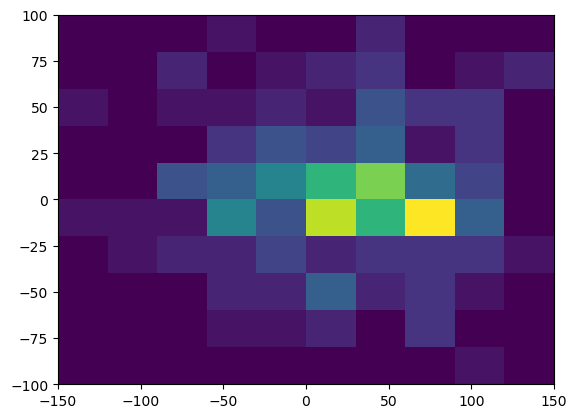

In [34]:
plt.hist2d(int_array_x_randannihi,int_array_y_randannihi, bins=10, range=[[-150, 150], [-100, 100]], cmap='viridis')
plt.show()

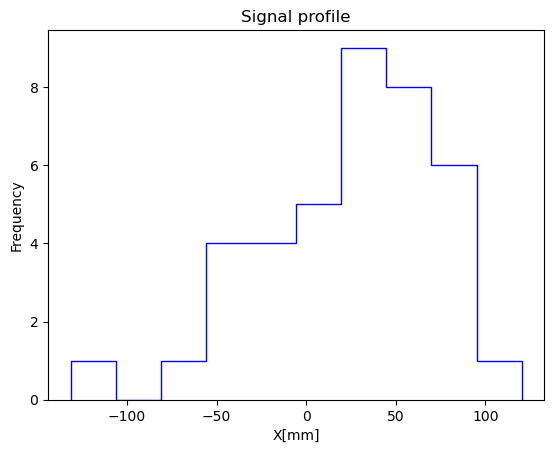

In [52]:
hist2d, x_edges, y_edges = np.histogram2d(int_array_x_randannihi, int_array_y_randannihi, bins=(20, 20))

slice_index = 9

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Signal profile')

# Show the plot
plt.show()

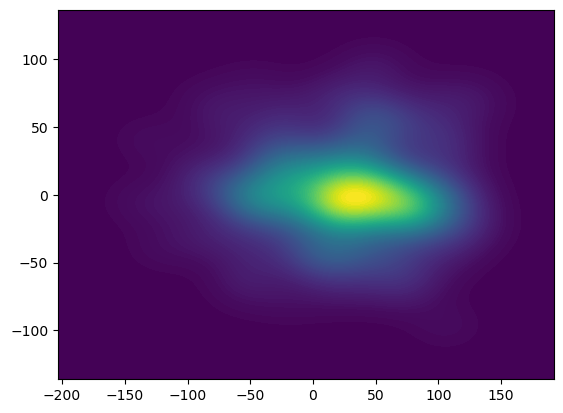

In [24]:
sns.kdeplot(x=int_array_x_randannihi, y=int_array_y_randannihi, fill=True, cmap='viridis', thresh=0, levels=100)
plt.show()


Coincidenze vere

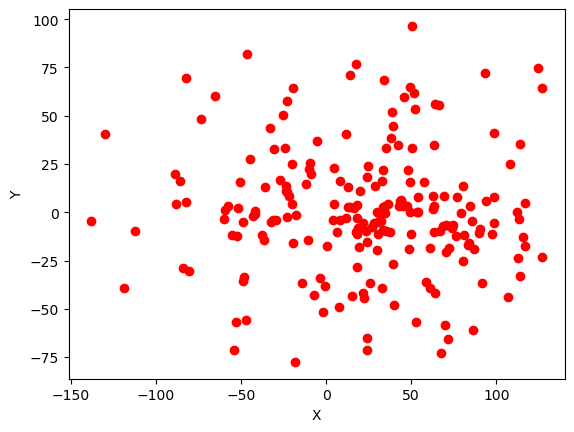

In [25]:
# Filter pairs with a TOF difference < 2ns, processName is 'annihil', and the same parent ID
pairs = pd.merge(data[(data['z'] > 0) & (data['processName'] == 'annihil')],
                 data[(data['z'] < 0) & (data['processName'] == 'annihil')], on='evt')

# Filter pairs with the same event number and a TOF difference < 2ns and same parent ID
pairs = pairs[(pairs['parentID_x'] == pairs['parentID_y'])]
fig2d = plt.figure()
ax2d = fig2d.add_subplot(111)  # 2D plot

num_lines = 100000000

int_array_x_trucoinc = []
int_array_y_trucoinc = []


# Plot a limited number of lines based on user input
for i in range(min(num_lines, len(pairs))):
    # Define lines as 3D vectors
    line_start = np.array([pairs['x_x'].iloc[i], pairs['y_x'].iloc[i], pairs['z_x'].iloc[i]])
    line_end = np.array([pairs['x_y'].iloc[i], pairs['y_y'].iloc[i], pairs['z_y'].iloc[i]])

    # Find intersections with the plane at z=0
    intersection = isect_line_plane_v3_4d(line_start, line_end, plane)

    # Plot in 3D
    #ax3d.scatter(line_start[0], line_start[1], line_start[2], label=f'Point 1 - Line {i + 1}')
    #ax3d.scatter(line_end[0], line_end[1], line_end[2], label=f'Point 2 - Line {i + 1}')
    #ax3d.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], [line_start[2], line_end[2]],
    #          label=f'Line {i + 1}', color='blue')
    #ax3d.scatter(intersection[0], intersection[1], intersection[2], color='red', marker='o', label=f'Intersection {i + 1}')

    # Plot in 2D (XY plane)
    ax2d.scatter(intersection[0], intersection[1], color='red', marker='o', label=f'Intersection {i + 1}')
    int_array_x_trucoinc.append(intersection[0])
    int_array_y_trucoinc.append(intersection[1])
    
    
    
    

#ax3d.set_xlabel('X')
#ax3d.set_ylabel('Y')
#ax3d.set_zlabel('Z')

ax2d.set_xlabel('X')
ax2d.set_ylabel('Y')

plt.show()

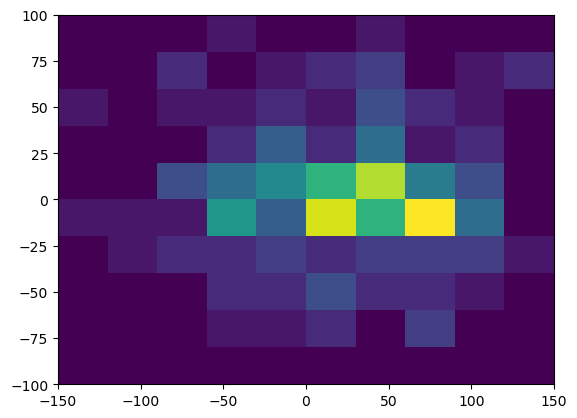

In [35]:
plt.hist2d(int_array_x_trucoinc,int_array_y_trucoinc, bins=10, range=[[-150, 150], [-100, 100]], cmap='viridis')
plt.show()

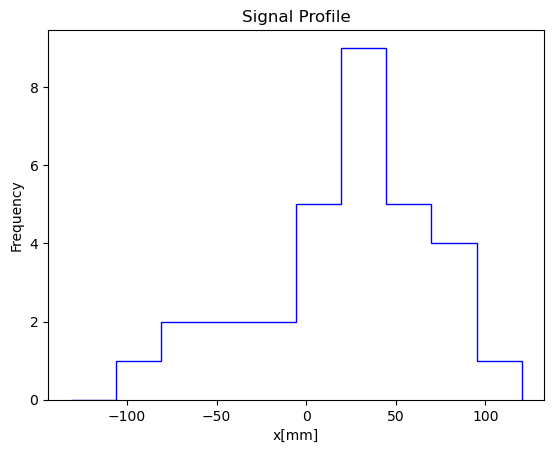

In [53]:
hist2d, x_edges, y_edges = np.histogram2d(int_array_x_trucoinc, int_array_y_trucoinc, bins=(20, 20))

slice_index = 9

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Profile')

# Show the plot
plt.show()

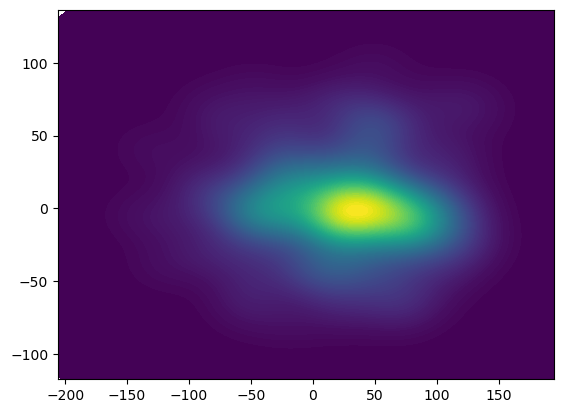

In [28]:
sns.kdeplot(x=int_array_x_trucoinc, y=int_array_y_trucoinc, fill=True, cmap='viridis', thresh=0, levels=100)
plt.show()


Tutti eventi

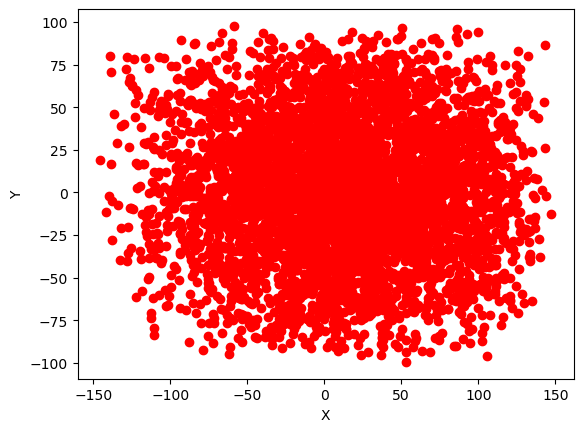

In [30]:
plane = np.array([0, 0, 1, 0])

# Filter pairs with a TOF difference < 2ns and processName is 'annihil'
pairs = pd.merge(data[(data['z'] > 0)],
                 data[(data['z'] < 0)], on='evt')# Filter pairs with the same event number and a TOF difference < 2ns
pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]

#fig3d = plt.figure()
#ax3d = fig3d.add_subplot(111, projection='3d')  # 3D plot

fig2d = plt.figure()
ax2d = fig2d.add_subplot(111)  # 2D plot

num_lines = 10000

int_array_x_fullrand = []
int_array_y_fullrand = []


# Plot a limited number of lines based on user input
for i in range(min(num_lines, len(pairs))):
    # Define lines as 3D vectors
    line_start = np.array([pairs['x_x'].iloc[i], pairs['y_x'].iloc[i], pairs['z_x'].iloc[i]])
    line_end = np.array([pairs['x_y'].iloc[i], pairs['y_y'].iloc[i], pairs['z_y'].iloc[i]])

    # Find intersections with the plane at z=0
    intersection = isect_line_plane_v3_4d(line_start, line_end, plane)

    # Plot in 3D
    #ax3d.scatter(line_start[0], line_start[1], line_start[2], label=f'Point 1 - Line {i + 1}')
    #ax3d.scatter(line_end[0], line_end[1], line_end[2], label=f'Point 2 - Line {i + 1}')
    #ax3d.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], [line_start[2], line_end[2]],
    #          label=f'Line {i + 1}', color='blue')
    #ax3d.scatter(intersection[0], intersection[1], intersection[2], color='red', marker='o', label=f'Intersection {i + 1}')

    # Plot in 2D (XY plane)
    ax2d.scatter(intersection[0], intersection[1], color='red', marker='o', label=f'Intersection {i + 1}')
    int_array_x_fullrand.append(intersection[0])
    int_array_y_fullrand.append(intersection[1])
    
    
    
    

#ax3d.set_xlabel('X')
#ax3d.set_ylabel('Y')
#ax3d.set_zlabel('Z')

ax2d.set_xlabel('X')
ax2d.set_ylabel('Y')

plt.show()

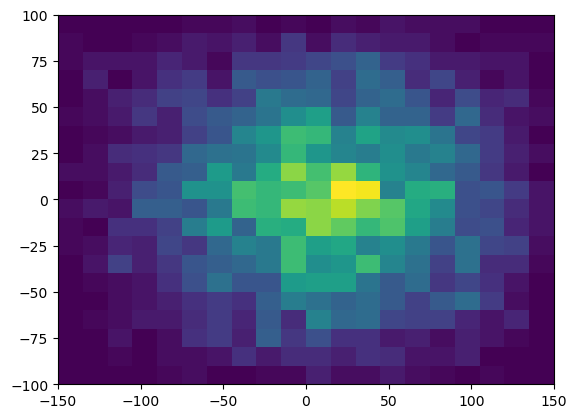

In [31]:
plt.hist2d(int_array_x_fullrand,int_array_y_fullrand, bins=20, range=[[-150, 150], [-100, 100]], cmap='viridis')
plt.show()

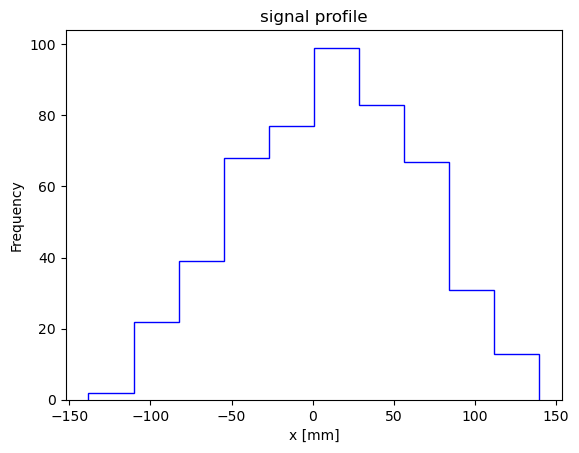

In [51]:
hist2d, x_edges, y_edges = np.histogram2d(int_array_x_fullrand, int_array_y_fullrand, bins=(20, 20))

slice_index = 10

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('x [mm]')
plt.ylabel('Frequency')
plt.title('signal profile')

# Show the plot
plt.show()

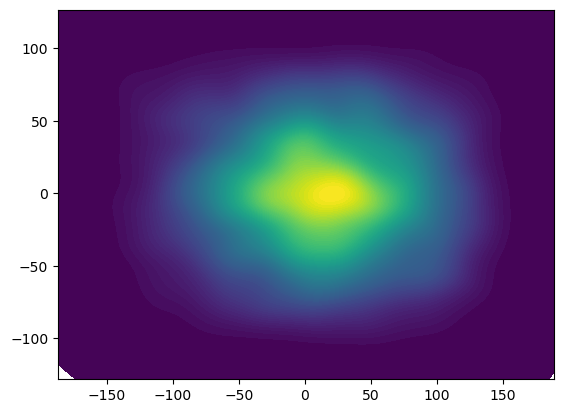

In [33]:
sns.kdeplot(x=int_array_x_fullrand, y=int_array_y_fullrand, fill=True, cmap='viridis', thresh=0,levels=100)
plt.show()
